### <ins>Import und Überblick des Datensatzes</ins>

In [1]:
import pandas as pd
import numpy as np

In [69]:
raw_df = pd.read_csv('/home/user/ai-project/all_in_one/smard_comlpete.gz',compression='gzip')
df=raw_df[raw_df.duplicated(keep=False) == False]
print(len(raw_df))
print(len(df))

169324
87404


In [57]:
this_row = df.loc[df.isna().sum(axis=1).idxmin()]
print(this_row)

Start_Date                          2022-01-31 00:00:00
End_Date                            2022-01-31 01:00:00
af_E_Volume_Activated_Plus_MWh                     20.0
af_E_Volume_Activated_Minus_MWh                   333.0
af_Activation_Price_Plus_EUR/MWh                 257.09
                                           ...         
E_PolandImport_MWh                               -996.0
E_NorwayExport_MWh                                 93.0
E_NorwayImport_MWh                               -554.0
E_BelgiumExport_MWh                               855.0
E_BelgiumImport_MWh                             -116.25
Name: 119418, Length: 98, dtype: object


In [71]:

df = df[(pd.to_datetime(df['Start_Date'])>=pd.to_datetime('2022-01-31 00:00:00')) & 
(pd.to_datetime(df['End_Date'])<=pd.to_datetime('2022-05-31 00:00:00'))]

In [72]:
#df = pd.read_csv('/home/user/ai-project/all_in_one/smard_comlpete.gz',compression='gzip')

df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['day_of_month'] = df['Start_Date'].dt.day
df['hour'] = df['Start_Date'].dt.hour

df.drop(columns=['Start_Date','End_Date'], inplace=True)

df.info()
#df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 119418 to 122296
Data columns (total 98 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   af_E_Volume_Activated_Plus_MWh                  2879 non-null   float64
 1   af_E_Volume_Activated_Minus_MWh                 2879 non-null   float64
 2   af_Activation_Price_Plus_EUR/MWh                2879 non-null   float64
 3   af_Activation_Price_Minus_EUR/MWh               2879 non-null   float64
 4   af_E_Volume_Procured_Plus_MW                    2879 non-null   float64
 5   af_E_Volume_Procured_Minus_MW                   2879 non-null   float64
 6   af_Procurement_Price_Plus_EUR/MW                2879 non-null   float64
 7   af_Procurement_Price_Minus_EUR/MW               2879 non-null   float64
 8   E_Volume_Calculated_Plus_MWh                    2879 non-null   float64
 9   E_Volume_Calculated_Minus_MWh          

In [73]:
#print amount of empty cells
df.isna().sum()

af_E_Volume_Activated_Plus_MWh       0
af_E_Volume_Activated_Minus_MWh      0
af_Activation_Price_Plus_EUR/MWh     0
af_Activation_Price_Minus_EUR/MWh    0
af_E_Volume_Procured_Plus_MW         0
                                    ..
E_NorwayImport_MWh                   0
E_BelgiumExport_MWh                  0
E_BelgiumImport_MWh                  0
day_of_month                         0
hour                                 0
Length: 98, dtype: int64

### <ins>Visualisierung der Korrelationen zwischen den Variablen</ins>

In [74]:
#find correlatoin coefficients
df_corr= df.corr()

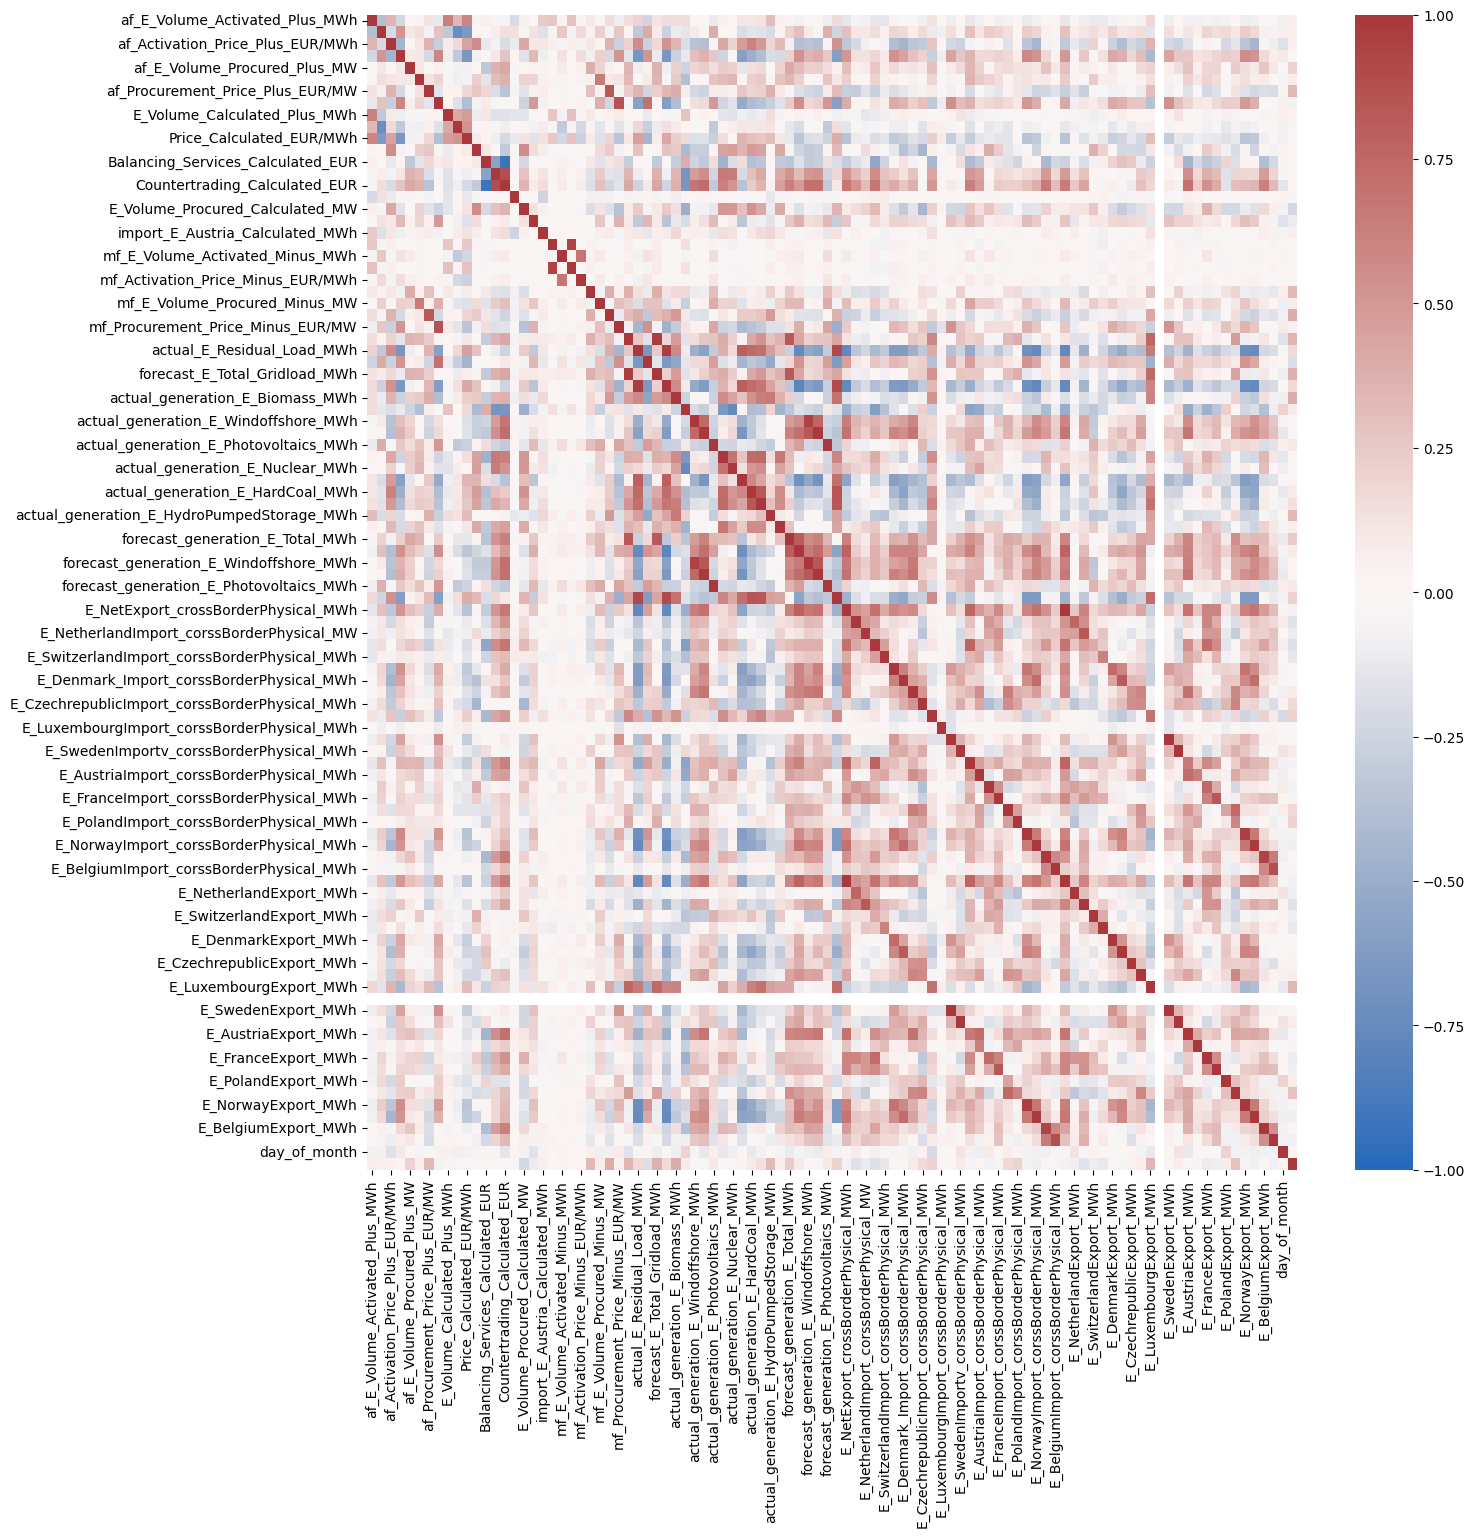

In [75]:
#plot correlation in a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

#plot Abb. 1
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, vmin=-1, vmax=1, center=0, cmap='vlag')
plt.show()

Ausgabe der stärksten Korrelationsvariablen:

In [76]:
#print 10 variables with the most correlation to Price_Calculated
print(df.corr().abs().nlargest(10,'Price_Calculated_EUR/MWh').index)

Index(['Price_Calculated_EUR/MWh', 'af_Activation_Price_Minus_EUR/MWh',
       'af_E_Volume_Activated_Minus_MWh', 'af_E_Volume_Activated_Plus_MWh',
       'E_Volume_Calculated_Minus_MWh', 'E_Volume_Calculated_Plus_MWh',
       'actual_E_Residual_Load_MWh', 'af_Activation_Price_Plus_EUR/MWh',
       'actual_E_Hydro_Pumped_Storage_MWh',
       'forecast_actual_E_Residual_Load_MWh'],
      dtype='object')


Bringt es etwas, die leeren Zellen mit Daten zu füllen? -> mit Mittelwert testen

### <ins> Füllen der leeren Zellen und Prüfung der Auswirkungen</ins>

Das Ersetzen der leeren Werte mit 0.0 wirkt sich besser auf die Qualität des Modells aus als
das Füllen der leeren Zellen mit dem Mittelwert der jeweiligen Spalte.

In [77]:
#fill empty cells with mean
mean_df = df.apply(lambda col: col.fillna(0), axis=0)
#mean_df = df.apply(lambda col: col.fillna(col.mean()), axis=0)
#mean_df.isna().sum()
mean_df.head()

,af_E_Volume_Activated_Plus_MWh,af_E_Volume_Activated_Minus_MWh,af_Activation_Price_Plus_EUR/MWh,af_Activation_Price_Minus_EUR/MWh,af_E_Volume_Procured_Plus_MW,af_E_Volume_Procured_Minus_MW,af_Procurement_Price_Plus_EUR/MW,af_Procurement_Price_Minus_EUR/MW,E_Volume_Calculated_Plus_MWh,E_Volume_Calculated_Minus_MWh,...,E_FranceExport_MWh,E_FranceImport_MWh,E_PolandExport_MWh,E_PolandImport_MWh,E_NorwayExport_MWh,E_NorwayImport_MWh,E_BelgiumExport_MWh,E_BelgiumImport_MWh,day_of_month,hour
119418,20.0,333.0,257.09,-14.81,2071.0,1995.0,1.72,25.76,0.0,-469.0,...,3217.0,0.0,0.0,-996.0,93.0,-554.0,855.00,-116.25,31,0
119419,1.0,531.0,233.00,-1.12,2071.0,1995.0,1.72,25.76,0.0,-651.0,...,3087.0,0.0,0.0,-728.0,0.0,-161.0,1000.75,-106.50,31,1
119420,60.0,29.0,265.10,-33.40,2071.0,1995.0,1.72,25.76,38.0,-62.0,...,3126.0,0.0,0.0,-776.0,285.0,-145.0,743.00,-5.00,31,2
119421,219.0,6.0,288.43,-54.47,2071.0,1995.0,1.72,25.76,514.0,0.0,...,2214.0,0.0,0.0,-790.0,337.0,0.0,881.50,-16.50,31,3
119422,126.0,24.0,298.14,-58.90,2230.0,2012.0,5.44,17.00,500.0,-56.0,...,2010.0,0.0,0.0,-675.0,148.0,-88.0,490.00,-45.00,31,4


In [78]:
mean_df_corr = mean_df.corr()

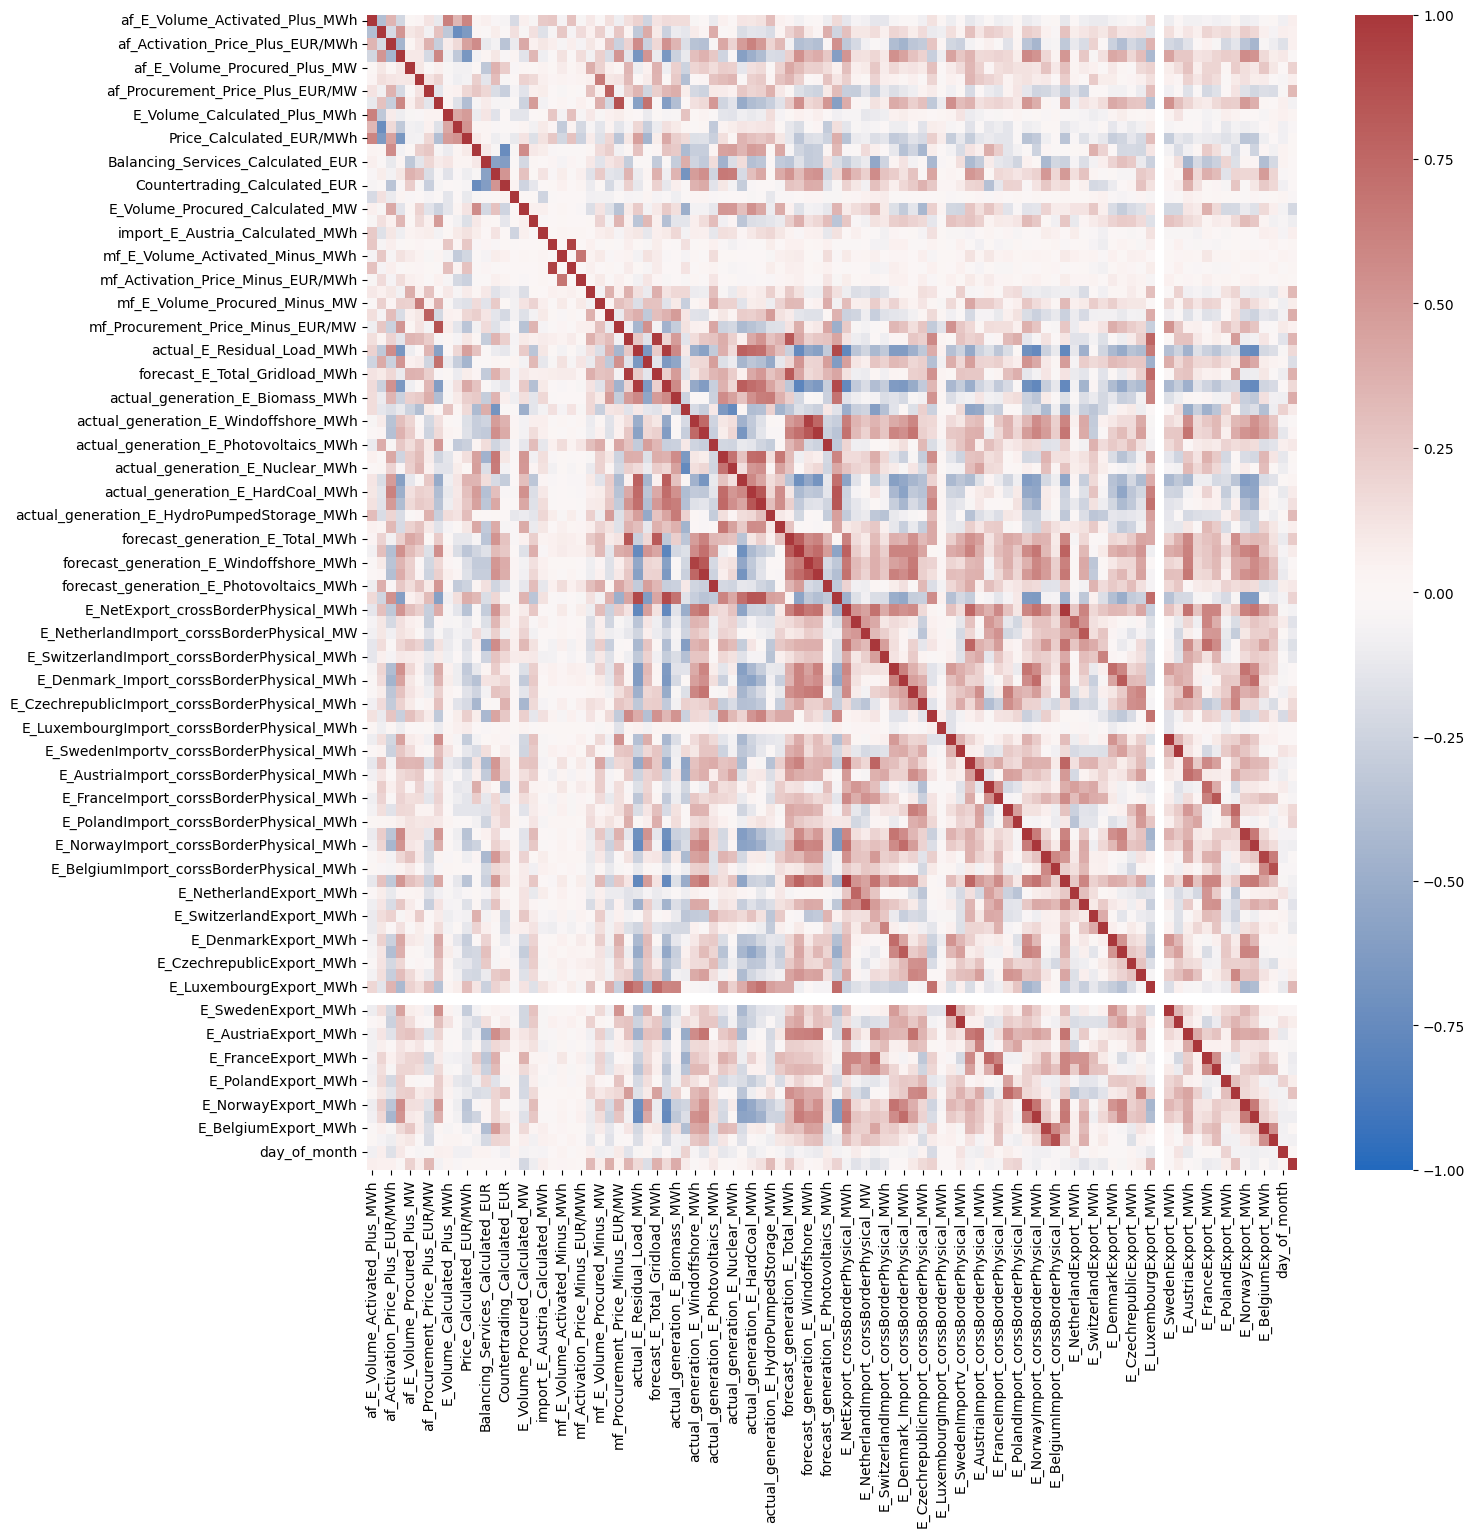

In [109]:
plt.figure(figsize=(15, 15))
sns.heatmap(mean_df_corr, vmin=-1, vmax=1, center=0, cmap='vlag')
plt.show()

#### Vergleich der stärksten Korrelationsvariablen im Bezug auf Price_Calculated_MWh

In [80]:
print(df.corr().abs().nlargest(10,'Price_Calculated_EUR/MWh').index)

Index(['Price_Calculated_EUR/MWh', 'af_Activation_Price_Minus_EUR/MWh',
       'af_E_Volume_Activated_Minus_MWh', 'af_E_Volume_Activated_Plus_MWh',
       'E_Volume_Calculated_Minus_MWh', 'E_Volume_Calculated_Plus_MWh',
       'actual_E_Residual_Load_MWh', 'af_Activation_Price_Plus_EUR/MWh',
       'actual_E_Hydro_Pumped_Storage_MWh',
       'forecast_actual_E_Residual_Load_MWh'],
      dtype='object')


In [81]:
print(mean_df.corr().abs().nlargest(10,'Price_Calculated_EUR/MWh').index)

Index(['Price_Calculated_EUR/MWh', 'af_Activation_Price_Minus_EUR/MWh',
       'af_E_Volume_Activated_Minus_MWh', 'af_E_Volume_Activated_Plus_MWh',
       'E_Volume_Calculated_Minus_MWh', 'E_Volume_Calculated_Plus_MWh',
       'actual_E_Residual_Load_MWh', 'af_Activation_Price_Plus_EUR/MWh',
       'actual_E_Hydro_Pumped_Storage_MWh',
       'forecast_actual_E_Residual_Load_MWh'],
      dtype='object')


Das füllen der Zellen hatte keinen signifikaten Effekt auf die Korrelation

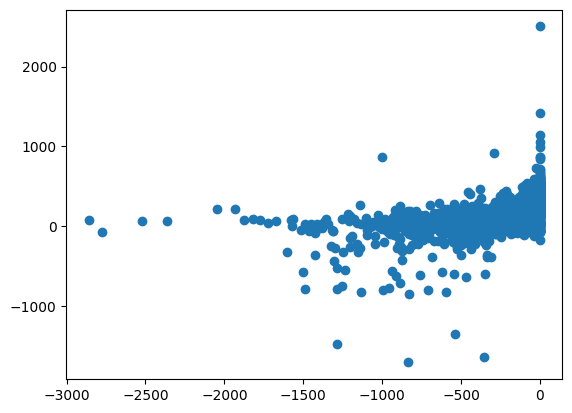

In [101]:
plt.scatter(x = df['E_Volume_Calculated_Minus_MWh'],y = df['Price_Calculated_EUR/MWh'])

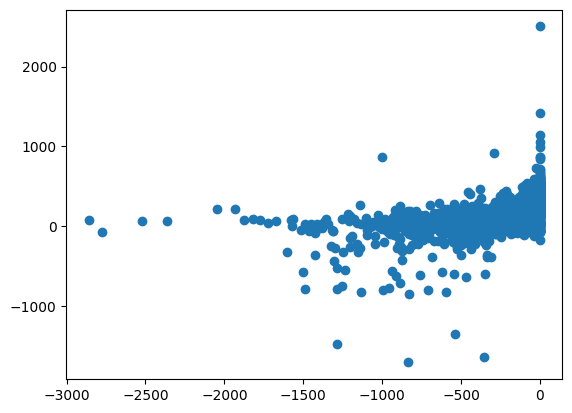

In [102]:
plt.scatter(x = mean_df['E_Volume_Calculated_Minus_MWh'],y = mean_df['Price_Calculated_EUR/MWh'])

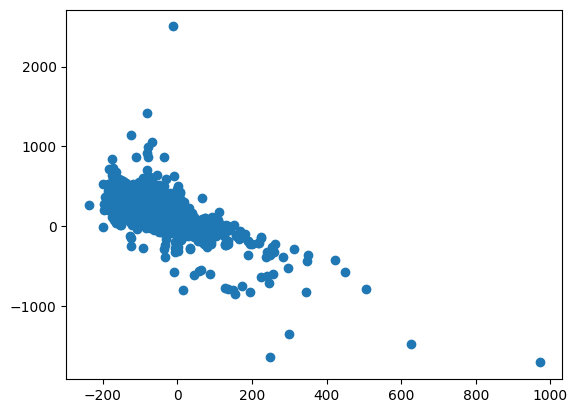

In [103]:
plt.scatter(x = df['af_Activation_Price_Minus_EUR/MWh'],y = df['Price_Calculated_EUR/MWh'])

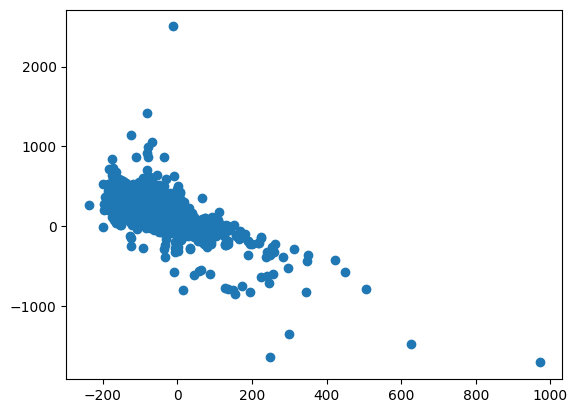

In [104]:
plt.scatter(x = mean_df['af_Activation_Price_Minus_EUR/MWh'],y = df['Price_Calculated_EUR/MWh'])

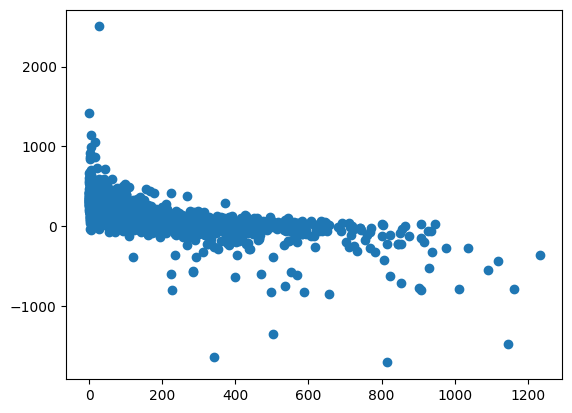

In [105]:
plt.scatter(x = df['af_E_Volume_Activated_Minus_MWh'],y = df['Price_Calculated_EUR/MWh'])
plt.xlabel=('activated Minus')
plt.ylabel=('Price calculated')
plt.show()

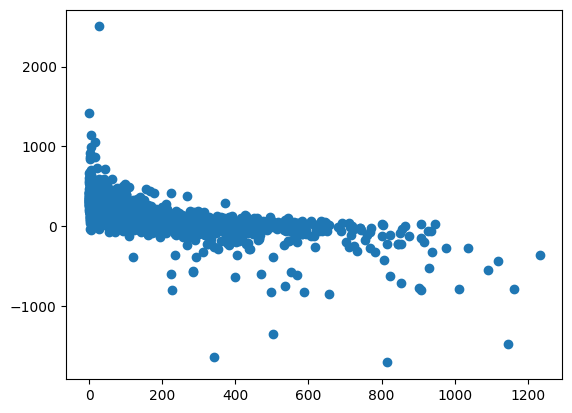

In [106]:
plt.scatter(x = mean_df['af_E_Volume_Activated_Minus_MWh'],y = df['Price_Calculated_EUR/MWh'])
plt.xlabel=('activated Minus')
plt.ylabel=('Price calculated')
plt.show()

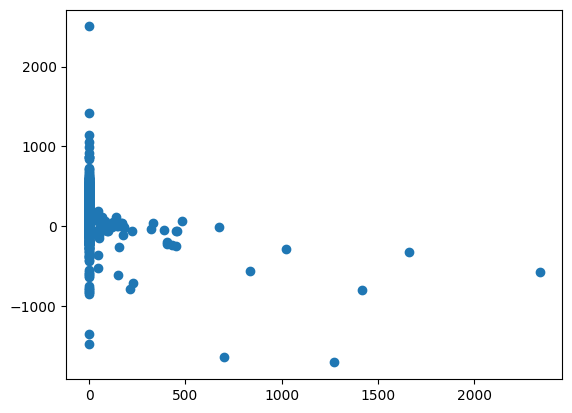

In [107]:
plt.scatter(x = df['mf_Activation_Price_Minus_EUR/MWh'],y = df['Price_Calculated_EUR/MWh'])

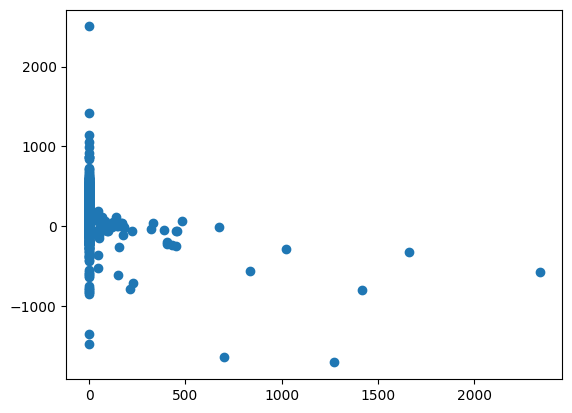

In [108]:
plt.scatter(x = mean_df['mf_Activation_Price_Minus_EUR/MWh'],y = df['Price_Calculated_EUR/MWh'])

Sehr schnell wird klar, das Ergänzen mit Mittelwerten ist nicht nur nutzlos sondern verschlechtert sogar die Aussagekraft

### <ins>Trainig des Modells</ins>

In [90]:
print(mean_df.corr().abs().nlargest(15,'Price_Calculated_EUR/MWh').index)

Index(['Price_Calculated_EUR/MWh', 'af_Activation_Price_Minus_EUR/MWh',
       'af_E_Volume_Activated_Minus_MWh', 'af_E_Volume_Activated_Plus_MWh',
       'E_Volume_Calculated_Minus_MWh', 'E_Volume_Calculated_Plus_MWh',
       'actual_E_Residual_Load_MWh', 'af_Activation_Price_Plus_EUR/MWh',
       'actual_E_Hydro_Pumped_Storage_MWh',
       'forecast_actual_E_Residual_Load_MWh',
       'forecast_generation_E_Original_MWh',
       'af_Procurement_Price_Minus_EUR/MW', 'actual_generation_E_Lignite_MWh',
       'E_NetExport_crossBorderPhysical_MWh',
       'E_NorwayExport_corssBorderPhysical_MWh'],
      dtype='object')


In [92]:
from sklearn.model_selection import train_test_split
#for testing, using mean_df -> df contains NaN cells, which cant be used out of the box

#remove nan values

X = mean_df[['af_Activation_Price_Minus_EUR/MWh',
       'af_E_Volume_Activated_Minus_MWh', 'af_E_Volume_Activated_Plus_MWh',
       'E_Volume_Calculated_Minus_MWh', 'E_Volume_Calculated_Plus_MWh',
       'actual_E_Residual_Load_MWh', 'af_Activation_Price_Plus_EUR/MWh',
       'actual_E_Hydro_Pumped_Storage_MWh',
       'forecast_actual_E_Residual_Load_MWh',
       'forecast_generation_E_Original_MWh',
       'af_Procurement_Price_Minus_EUR/MW', 'actual_generation_E_Lignite_MWh',
       'E_NetExport_crossBorderPhysical_MWh',
       'E_NorwayExport_corssBorderPhysical_MWh']]


#target
y = mean_df['Price_Calculated_EUR/MWh']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [93]:
print(X_train.shape)

(2159, 14)


In [94]:
X_train

,af_Activation_Price_Minus_EUR/MWh,af_E_Volume_Activated_Minus_MWh,af_E_Volume_Activated_Plus_MWh,E_Volume_Calculated_Minus_MWh,E_Volume_Calculated_Plus_MWh,actual_E_Residual_Load_MWh,af_Activation_Price_Plus_EUR/MWh,actual_E_Hydro_Pumped_Storage_MWh,forecast_actual_E_Residual_Load_MWh,forecast_generation_E_Original_MWh,af_Procurement_Price_Minus_EUR/MW,actual_generation_E_Lignite_MWh,E_NetExport_crossBorderPhysical_MWh,E_NorwayExport_corssBorderPhysical_MWh
121858,-62.36,18.0,332.0,0.0,142.0,31803.25,319.70,582.25,28230.25,26598.75,15.72,11489.00,818.50,0.00
121592,-24.50,7.0,10.0,0.0,601.0,25297.75,275.11,3650.50,25730.25,26284.75,34.12,12694.25,2661.00,1377.25
121468,-84.99,6.0,120.0,0.0,515.0,46132.50,344.52,295.50,44805.75,41849.50,8.00,13542.00,-2058.75,0.00
120650,-57.27,166.0,3.0,-335.0,49.0,49807.75,289.04,613.50,48819.75,46080.25,4.64,13201.50,2240.00,0.00
121488,-76.15,19.0,122.0,-96.0,326.0,55373.00,325.98,1.75,53459.25,46922.25,2.12,13584.50,-5824.25,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121427,-42.48,29.0,60.0,0.0,215.0,28521.75,273.97,565.50,25933.25,30626.50,16.72,13270.25,4451.50,710.75
120598,-83.32,2.0,213.0,0.0,326.0,30629.50,354.94,2261.00,28785.25,31200.75,5.60,12347.00,7214.50,566.50
120762,-75.10,15.0,16.0,-33.0,84.0,38836.75,335.23,978.50,39963.25,38009.75,3.20,14471.00,4074.75,0.00
119945,16.53,172.0,5.0,-230.0,0.0,18378.00,243.53,3254.25,18982.00,31073.75,4.64,7233.75,10962.00,1010.50


In [95]:
from sklearn.linear_model import LinearRegression
#create modell
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [96]:
print(lm.coef_)
print(lm.intercept_)

[-1.05057486e+00 -2.18573305e-01  3.77052402e-01  2.65910340e-02
  1.12384301e-01  3.59013360e-03  2.10376828e-01 -5.33771908e-03
 -2.82433671e-03 -1.44528238e-03 -1.77771378e-01  1.38376897e-03
  8.61706743e-04  7.01155852e-03]
33.18891870239672


In [97]:
#evaluate
#compare predicted price to actual price

cost_pred = lm.predict(X_test)
#R-squared ->coefficient of determination
print(lm.score(X_test, y_test))

0.7488013136344522


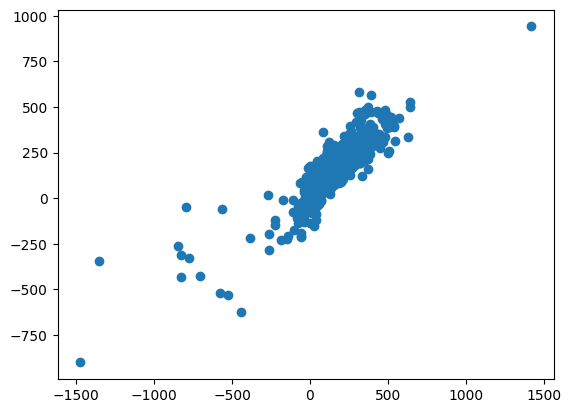

In [98]:
#visualize error

#plt.xlabel('Price actual')
#plt.ylabel('Price predicted')
#sns.lmplot(x='Price actual',
#           y='price predicted',
#           data=(X_test, y_test),
#           scatter_kws={'alpha':0.3})
plt.scatter(x = y_test, y = cost_pred)
plt.show()

Eine Optimale Vorhersage wäre die Funktion f(x)=y

In [99]:
#find Mean Squarred Error -> how well did modell perform
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, cost_pred)
print(mse)

9886.360326507796


CHANGELOG:
von 14600 -> 13600: fillnan(mean())-> fillnan(0)
von 13600 -> ~9900: time slice von 5_monate statt all_time

//zu beginn waren sehr viele duplicates im datensatz, das entfernen dieser hat das ergebnis um etwa 1000 verschlechtert